# The Titanic Project

This is my first hands-on project with Python. The famous Titanic database is used. I have used various libraries like SeaBorn, Pandas, Matplotlib, etc. to make inferences about the database. 

Various graphs in this project help us understand the power of visualization that is provided by different libraries in Python and how we can interpret a large dataset in a better manner with the help of such techniques. 

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('csv/train.csv') # Load csv into the DataFrame

In [4]:
df.head() # Print the top contents of the DataFrame to understand the contents

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info() # This helps us understand the Data Types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Importing other libraries that are required 

We import the libraries that we are going to use to analyze the data. 
Usually Analysis begins with normal questions like in our case we would as questions related to the characteristics of the passengers. 

matplotlib inline helps us to show the plots in the notebook itself and doesn't pop an extra window to display them.

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


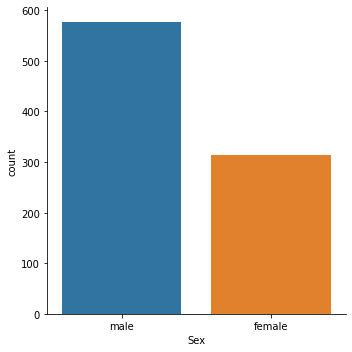

In [7]:
sns.catplot(x='Sex',kind='count',data=df)

#This is our first plot which is just showing us the count of the passengers based on their sex. 
#We have used the catplot function of the Seaborn library 

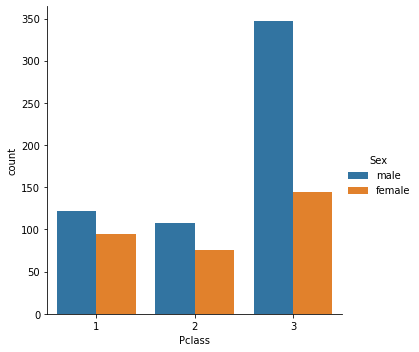

In [8]:
sns.catplot(x='Pclass', kind='count', hue='Sex', data=df)

#Here we take a step further. We plot the count of passengers based on the class that they are traveling in. 
#We further divide that count based on the sex of the passengers which gives us a detailed view of the same. 

## Function to know if the person is male,female or a child 

Now we see that we have the age and sex of the passengers which allows us to categorize them even further as male,female and a child. This will help us understand our data in detail as we will have some more information about our passengers. For this purpose we define a simple function below:

In [9]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [10]:
df['person'] = df[['Age','Sex']].apply(male_female_child, axis = 1)

# We create a column 'person' where we apply our created function and it helps us understand whether the passenger is a...
# male, female or a child

In [11]:
df.head(10)

# We print our Data Frame to see if our goal is achieved

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


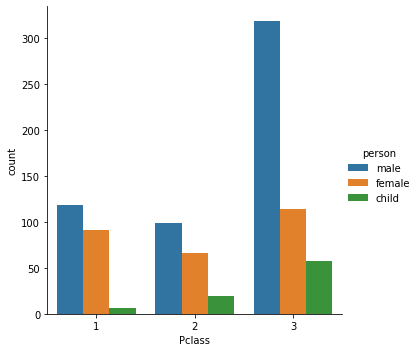

In [12]:
sns.catplot(x='Pclass', kind='count', hue='person', data=df)

# Now we plot the similar plot as the last one but this time around we use the column 'person' that we created. 
# This gives us a plot where passengers are divided into groups depending upon if they are male,female or a child

<AxesSubplot:>

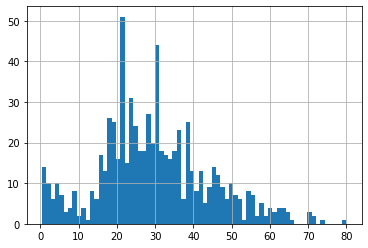

In [13]:
df['Age'].hist(bins=70)

# This cell shows us how to plot a simple histogram from a column of our data. The bins attribute helps decide the number..
# of bars that would be present in our data

In [14]:
df['Age'].mean()

# We calculate the mean of one of the columns using the mean() function. 

29.69911764705882

In [15]:
df['person'].value_counts()

# This helps us understand the count of different types of people present in the 'person' column of our data. 

male      537
female    271
child      83
Name: person, dtype: int64

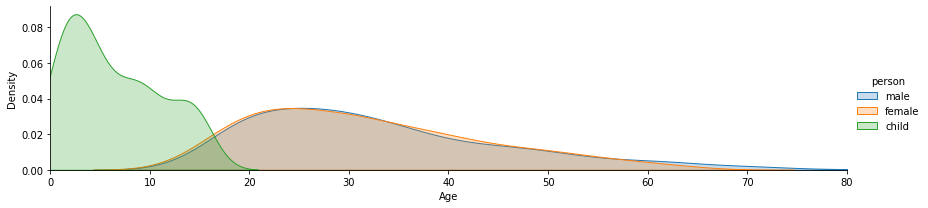

In [16]:
fig = sns.FacetGrid(df,hue='person',aspect=4) #Plot different subsets of data 
fig.map(sns.kdeplot,'Age',shade=True) #Plot it in the form of a density curve
oldest = df['Age'].max() #store the max value in variable
fig.set(xlim=(0,oldest)) #Set the limit of the X-axis
fig.add_legend() # Show legend for the graph

# Here we used another type of graph in the form of a density curve with different shades to denote different kinds of..
# passengers present in our data based on whether they are a male,female or a child. 

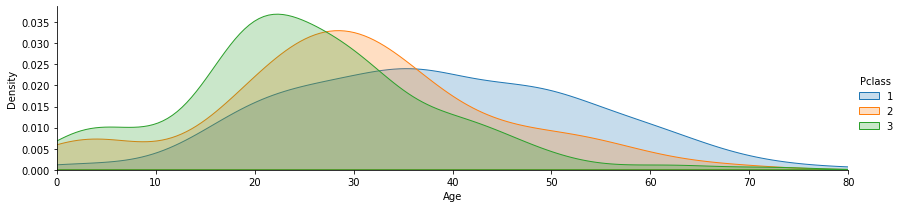

In [17]:
fig = sns.FacetGrid(df,hue='Pclass',aspect=4) #Plot different subsets of data 
fig.map(sns.kdeplot,'Age',shade=True) #Plot it in the form of a density curve
oldest = df['Age'].max() #store the max value in variable
fig.set(xlim=(0,oldest)) #Set the limit of the X-axis
fig.add_legend() # Show legend for the graph

# Here we used the previous graph in the form of a density curve with different shades to denote different kinds of..
# passengers present in our data based on the class that they are traveling in.

In [18]:
deck = df['Cabin'].dropna() 

# This drops all the NaN values in the 'Cabin' column

In [19]:
deck.head() 

#Checking if the NaN values are dropped. This returns only the rows without NaN values.

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

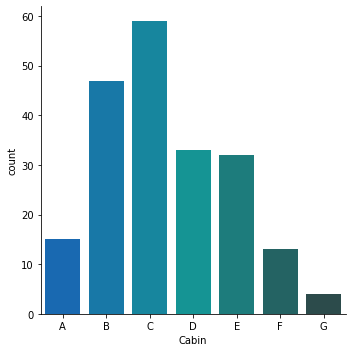

In [20]:
levels = []
for level in deck:
    levels.append(level[0])

cabin = pd.DataFrame(levels)

cabin.columns = ['Cabin']

cabin = cabin[cabin.Cabin != 'T']
sns.catplot(x='Cabin', data=cabin, kind='count', palette='winter_d', order=['A','B','C','D','E','F','G'])

# This Graph gives us the count of the passengers in each cabin level of the ship.

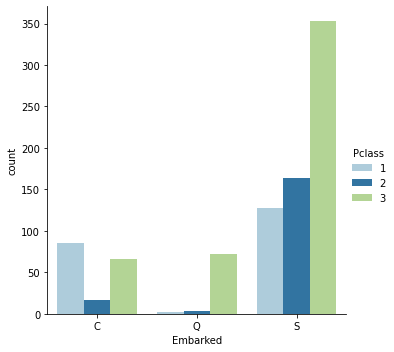

In [21]:
sns.catplot(x='Embarked', kind='count',data=df,hue='Pclass',order=['C','Q','S'],palette='Paired')

# This graph simply shows us the count of passengers from each class and the place from where they boarded the ship. 

In [22]:
df['Alone'] = df.SibSp + df.Parch
df['Alone']

# This cell helps us understand whether the passenger is traveling alone or with a family/sibling. 
# It takes the two columns in our Dataset and adds the number of fellow travellers a passenger is with.

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [23]:
df['Alone'].loc[df['Alone']>0] = 'With Family'
df['Alone'].loc[df['Alone']==0] = 'Alone'

# This helps us categorize whether the passenger was traveling alone or with family in a better manner.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12928\2390079445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Alone'].loc[df['Alone']>0] = 'With Family'


In [24]:
df.head() #Checking if our changes have been executed. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


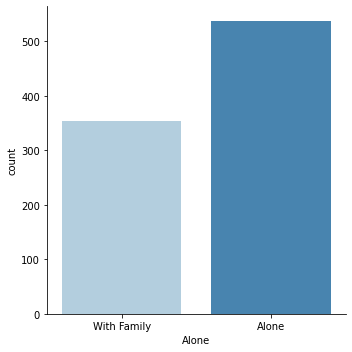

In [25]:
sns.catplot(x='Alone',kind='count',data=df,palette='Blues')

# This gives us a count of passengers traveling alone and with a family

In [26]:
df['Survivor'] = df.Survived.map({0:'No',1:'Yes'})

# This converts the 0 and 1 values in the columns to No and Yes for better understanding 

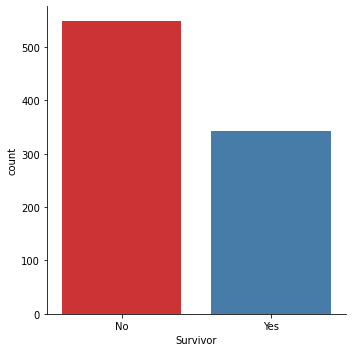

In [27]:
sns.catplot(x='Survivor',data=df,kind='count',palette='Set1')

# This graph gives us the count of whether the passengers survived or did not survive

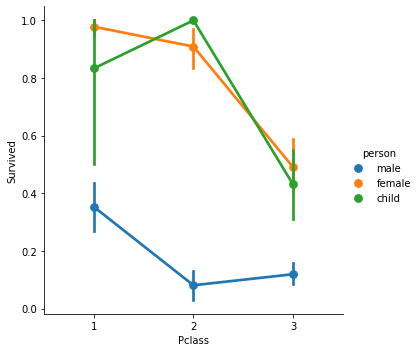

In [28]:
sns.catplot(x='Pclass',y='Survived',kind='point',hue='person',data=df)

# This graph gives us the information about the survivors and whether they were male,female or a child from each class.

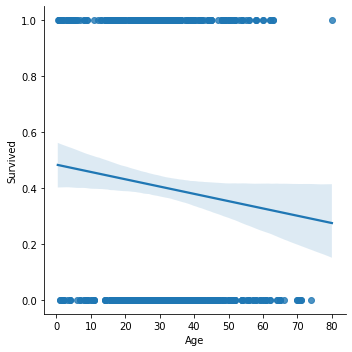

In [29]:
sns.lmplot(x='Age',y='Survived',data=df)

# This gives us a regression model of the data about survival with respect to the age of the passengers. 
# As you can see the survival rate dropped considerably with an increase in the age.

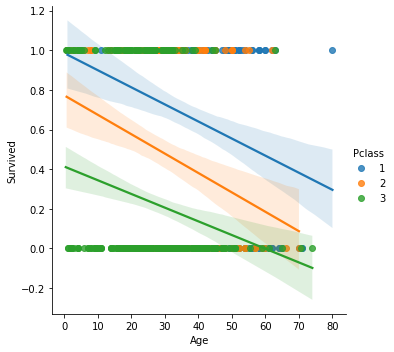

In [30]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=df)

# This gives us a regression model with respect to the survivors based on the class they were traveling in. 
# As you can see the people who travelled in first class had a better survival rate than those who travelled in the...
# third class. Although all the three classes showed a trend of chances of survival being less with increase in age. 

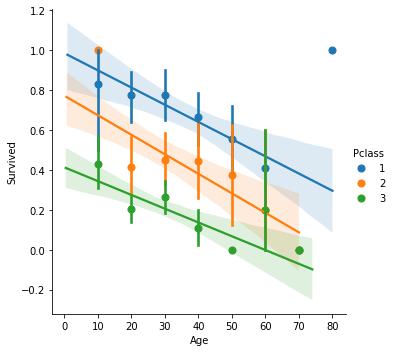

In [31]:
generation = [10,20,30,40,50,60,70,80] 
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=df,x_bins=generation)

# This graph gives us a detailed view about the regression trend based on the survival of passengers with respect to the..
# age and the class they travelled in. You can see a negative trend present just like previous cases. 
# we have added bin values for better understanding of the age groups that survived

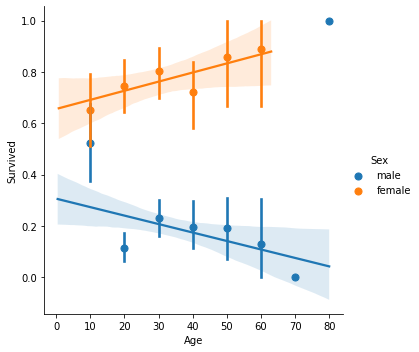

In [32]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=df,x_bins=generation)

# This graph shows us the survival rate of passengers based on their sex and their Age.
# You can see a positive trend in the case of female passengers and a negative trend in the case of males with age.

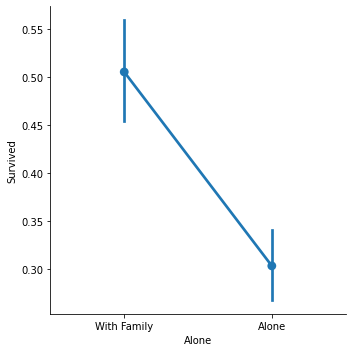

In [33]:
sns.catplot(x='Alone',y='Survived',data=df,kind='point')

# This graph simply shows us the survival rate of passengers based on whether they were traveling alone or not. 
# you can see that the passengers that travelled alone had a lesser chance of survival than others. 